# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

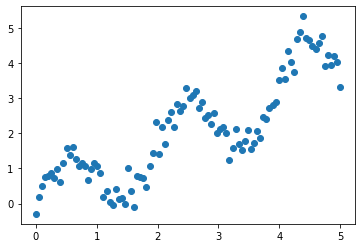

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5733774579501502


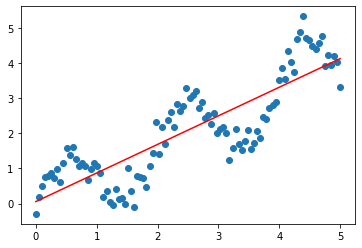

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

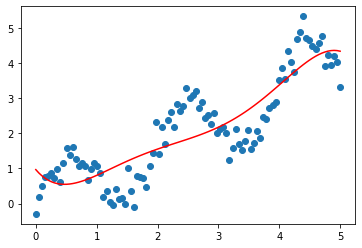

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-2.0528961   3.13232995 -1.56063062  0.34478483 -0.02722787]
interception:  0.9654703789026993


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.96547038, 0.86957976, 0.78849363, 0.72108509, 0.66627896,
       0.62305066, 0.59042515, 0.56747589, 0.5533237 , 0.54713575,
       0.54812446, 0.5555464 , 0.56870128, 0.5869308 , 0.60961765,
       0.63618437, 0.66609234, 0.69884065, 0.73396505, 0.77103691,
       0.80966206, 0.84947982, 0.89016185, 0.9314111 , 0.97296074,
       1.0145731 , 1.05603858, 1.09717454, 1.13782432, 1.17785607,
       1.21716174, 1.25565595, 1.293275  , 1.32997569, 1.36573435,
       1.40054569, 1.43442176, 1.46739087, 1.49949653, 1.53079634,
       1.56136096, 1.59127302, 1.62062602, 1.64952329, 1.67807691,
       1.70640663, 1.7346388 , 1.76290528, 1.79134239, 1.82008984,
       1.84928963, 1.87908498, 1.90961928, 1.941035  , 1.97347262,
       2.00706956, 2.04195907, 2.07826923, 2.11612181, 2.15563123,
       2.19690346, 2.24003499, 2.28511171, 2.33220785, 2.38138493,
       2.43269067, 2.48615788, 2.54180347, 2.59962728, 2.6596111 ,
       2.72171751, 2.78588887, 2.85204622, 2.92008819, 2.98988

In [15]:
regr_poly.predict(X_poly)

array([0.96547038, 0.86957976, 0.78849363, 0.72108509, 0.66627896,
       0.62305066, 0.59042515, 0.56747589, 0.5533237 , 0.54713575,
       0.54812446, 0.5555464 , 0.56870128, 0.5869308 , 0.60961765,
       0.63618437, 0.66609234, 0.69884065, 0.73396505, 0.77103691,
       0.80966206, 0.84947982, 0.89016185, 0.9314111 , 0.97296074,
       1.0145731 , 1.05603858, 1.09717454, 1.13782432, 1.17785607,
       1.21716174, 1.25565595, 1.293275  , 1.32997569, 1.36573435,
       1.40054569, 1.43442176, 1.46739087, 1.49949653, 1.53079634,
       1.56136096, 1.59127302, 1.62062602, 1.64952329, 1.67807691,
       1.70640663, 1.7346388 , 1.76290528, 1.79134239, 1.82008984,
       1.84928963, 1.87908498, 1.90961928, 1.941035  , 1.97347262,
       2.00706956, 2.04195907, 2.07826923, 2.11612181, 2.15563123,
       2.19690346, 2.24003499, 2.28511171, 2.33220785, 2.38138493,
       2.43269067, 2.48615788, 2.54180347, 2.59962728, 2.6596111 ,
       2.72171751, 2.78588887, 2.85204622, 2.92008819, 2.98988

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])

In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

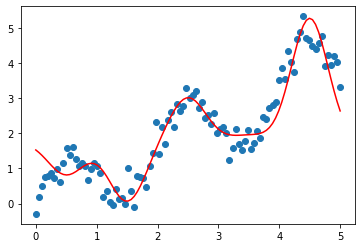

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.93900703 -1.69313538  1.25841017  0.18097634  3.51123344]
interception:  1.7589635746279193


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

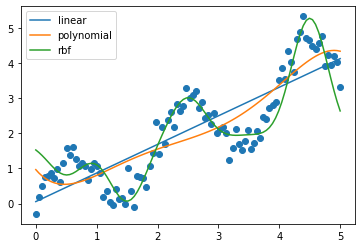

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5733774579501502


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5032820343411728


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.23010763008033688
